## A Visual Understanding of the Softmax Function

#### Reza Bagheri

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random

from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings("ignore")

### Logistic regression

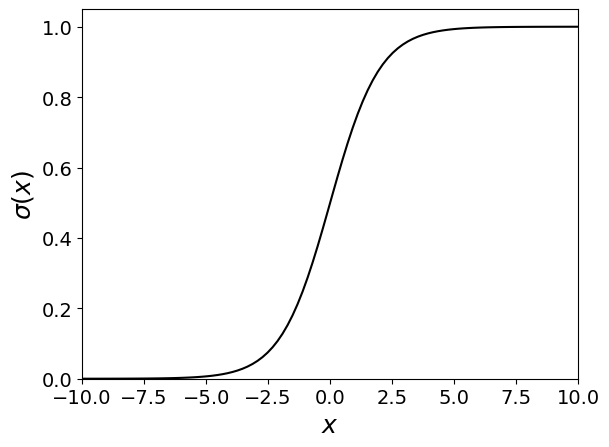

In [2]:
x_array = np.linspace(-10, 10, 100)
P = 1 / (1+np.exp(-x_array))
plt.plot(x_array, P, color='black', label="Logistic function")
plt.xlim([-10, 10])
plt.ylim([0, 1.05])
plt.xlabel('$x$', fontsize=18)
plt.ylabel('$\sigma(x)$', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

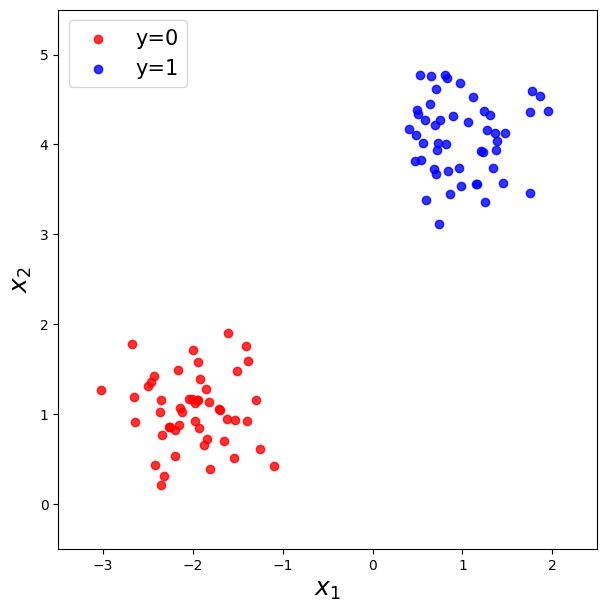

In [3]:
np.random.seed(0)
x1 = np.random.randn(50, 2) * 0.4 + np.array([-2, 1])
x2 = np.random.randn(50, 2) * 0.4 + np.array([1, 4])
y1 = np.array(50*[0]+50*[1])
X1 = np.vstack((x1, x2))

plt.figure(figsize=(7, 7))
plt.scatter(X1[y1==0, 0], X1[y1==0,1], label="y=0", alpha=0.8, color="red")
plt.scatter(X1[y1==1, 0], X1[y1==1,1], label="y=1", alpha=0.8, color="blue")
plt.legend(loc="upper left", fontsize=15)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18)
plt.xlim([-3.5, 2.5])
plt.ylim([-0.5, 5.5])
ax = plt.gca()
ax.set_aspect('equal')

plt.show()

In [4]:
lg=LogisticRegression(random_state=0)
lg.fit(X1, y1)
w0 = lg.intercept_[0]
w = lg.coef_[0]
w1, w2 = w[0], w[1]
w0, w1, w2

(-3.2454330021877276, 1.585148866887806, 1.5721724921384819)

In [5]:
def plot_boundary(X, y, clf, lims, alpha=0.7):
    gx1, gx2 = np.meshgrid(np.arange(lims[0], lims[1],
                                    (lims[1]-lims[0])/1500.0),
                           np.arange(lims[2], lims[3],
                                    (lims[3]-lims[2])/1500.0))
    backgd_colors = ['lightsalmon', 'aqua', 'lightgreen', 'yellow']
    marker_colors = ['red', 'blue', 'green', 'orange']
    gx1l = gx1.flatten()
    gx2l = gx2.flatten()
    gx = np.vstack((gx1l,gx2l)).T
    gyhat = clf.predict(gx)
    gyhat = gyhat.reshape(gx1.shape)
    target_labels = np.unique(y)
    n = len(target_labels)
    plt.pcolormesh(gx1, gx2, gyhat, cmap=ListedColormap(backgd_colors[:n]))
    for i, label in enumerate(target_labels):
        plt.scatter(X[y==label, 0], X[y==label,1], label="y="+str(label),
                    alpha=alpha, color=marker_colors[i])

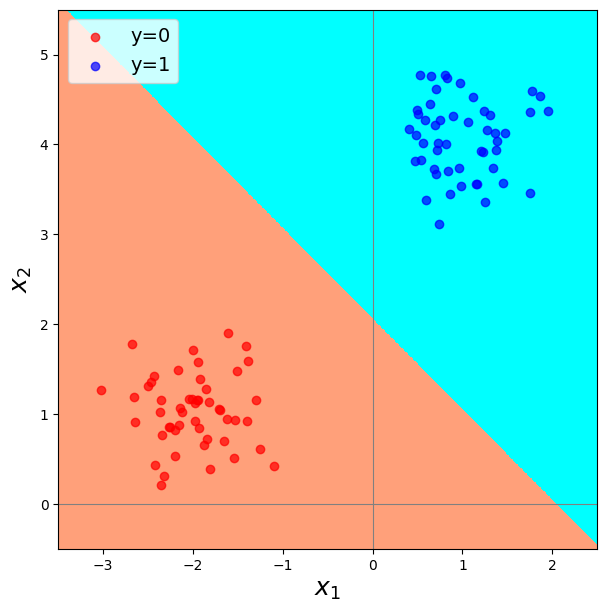

In [6]:
plt.figure(figsize=(7, 7))
plot_boundary(X1,y1, lg, lims=[-3.5, 2.5, -0.5, 5.5])
plt.legend(loc='upper left', fontsize=14)

plt.axhline(0, color='grey', linewidth=0.8)
plt.axvline(0, color='grey', linewidth=0.8)

plt.xlim([-3.5, 2.5])
plt.ylim([-0.5, 5.5])
ax = plt.gca()
ax.set_aspect('equal')

plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$x_2$', fontsize=18)

plt.show()

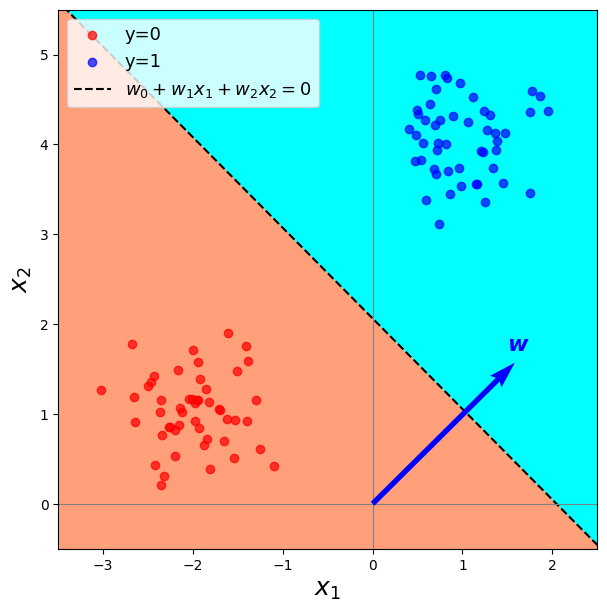

In [7]:
plt.figure(figsize=(7, 7))
plot_boundary(X1, y1, lg, lims=[-3.5, 2.5, -0.5, 5.5])

# Plot the vector w
plt.quiver([0], [0], w[0], w[1], color=['b'],
           width=0.01, angles='xy', scale_units='xy',
           scale=1, zorder=5)
# Plot the bounday
x1_boundary = np.linspace(-4, 4, 100)
x2_boundary = -(w0 + w1*x1_boundary) / w2
plt.plot(x1_boundary, x2_boundary,
         color='black', linestyle="--", label="$w_0+w_1x_1+w_2x_2=0$")
plt.legend(loc='upper left', fontsize=13)
plt.axhline(0, color='grey', linewidth=0.8)
plt.axvline(0, color='grey', linewidth=0.8)

plt.text(1.5, 1.7, "$\mathregular{w}$", color='b', fontsize=16,
         weight="bold", style="italic")

plt.xlim([-3.5, 2.5])
plt.ylim([-0.5, 5.5])
ax = plt.gca()
ax.set_aspect('equal')

plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$x_2$', fontsize=18)

plt.show()

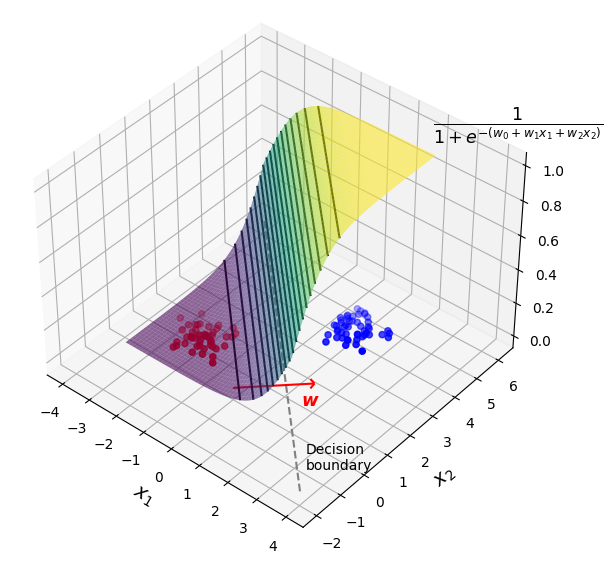

In [8]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(121, projection='3d')
lims=[-3.5, 2.5, -0.5, 5.5]
gx1, gx2 = np.meshgrid(np.arange(lims[0], lims[1], (lims[1]-lims[0])/800.0),
                       np.arange(lims[2], lims[3], (lims[3]-lims[2])/800.0))

gx1l = gx1.flatten()
gx2l = gx2.flatten()
gx = np.vstack((gx1l,gx2l)).T
gyhat = lg.predict_proba(gx)[:, 1]
gyhat = gyhat.reshape(800, 800)

ax.scatter(X1[y1==0, 0], X1[y1==0,1], 0*len(X1[y1==0, 0]),
           label="y=0", color="red")
ax.scatter(X1[y1==1, 0], X1[y1==1,1], 0*len(X1[y1==0, 0]),
           label="y=1", color="blue")

ax.plot_surface(gx1, gx2, gyhat, alpha=0.6, cmap=cm.viridis)
ax.contour3D(gx1, gx2, gyhat, 20, cmap=ListedColormap(['black']))
ax.quiver(0, 0, 0, w1, w2, 0, color=['red'], arrow_length_ratio=0.05)

# Plot the bounday
x1_boundary = np.linspace(-4, 4, 100)
x2_boundary = -(w0 + w1*x1_boundary) / w2
ax.plot(x1_boundary, x2_boundary, [0]*len(x1_boundary),
        color='gray', linestyle="--")

ax.view_init(40, -50)
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.text2D(0.8, 0.77, "$\\frac{1}{1+e^{-(w_0+w_1x_1+w_2x_2)}}$",
          transform=ax.transAxes, fontsize=18)
ax.text2D(0.55, 0.25, "$\mathregular{w}$",
          color='red', transform=ax.transAxes, fontsize=13,
          weight="bold", style="italic")
ax.text2D(0.56, 0.13, "Decision\nboundary",
          color='black', transform=ax.transAxes, fontsize=10)
plt.show()

### Softmax regression

In [9]:
np.random.seed(0)
x1 = np.random.randn(50, 2) * 0.4 + np.array([2, 3])
x2 = np.random.randn(50, 2) * 0.7 + np.array([6, 4])
x3 = np.random.randn(50, 2) * 0.5 + np.array([2, 5])

y2 = np.array(50*[1]+50*[2]+50*[3])
X2 = np.vstack((x1, x2, x3))

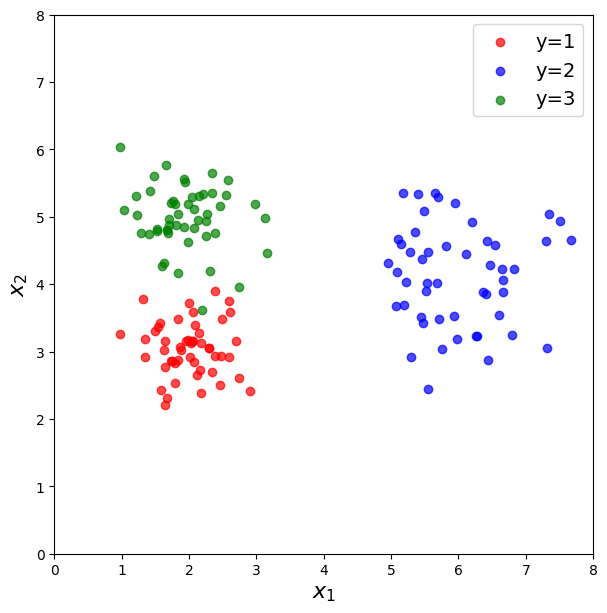

In [10]:
plt.figure(figsize=(7,7))
plt.scatter(X2[y2==1, 0], X2[y2==1,1], label="y=1", alpha=0.7, color="red")
plt.scatter(X2[y2==2, 0], X2[y2==2,1], label="y=2", alpha=0.7, color="blue")
plt.scatter(X2[y2==3, 0], X2[y2==3,1], label="y=3", alpha=0.7, color="green")
plt.legend(loc="best", fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$x_2$", fontsize=16)
plt.xlim([0, 8])
plt.ylim([0, 8])
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

In [11]:
softmax_reg = LogisticRegression()
softmax_reg.fit(X2, y2)

LogisticRegression()

In [12]:
w1, w2, w3 = softmax_reg.coef_[0], softmax_reg.coef_[1], \
             softmax_reg.coef_[2]
w10, w20, w30 = softmax_reg.intercept_[0], softmax_reg.intercept_[1], \
                softmax_reg.intercept_[2]
w11, w12 = w1[0], w1[1]
w21, w22 = w2[0], w2[1]
w31, w32 = w3[0], w3[1]

In [13]:
w10, w20, w30

(11.377497297048969, -6.9123414085359345, -4.46515588851296)

In [14]:
w1, w2, w3

(array([-0.94897039, -2.05032658]),
 array([1.86743948, 0.11633388]),
 array([-0.91846909,  1.9339927 ]))

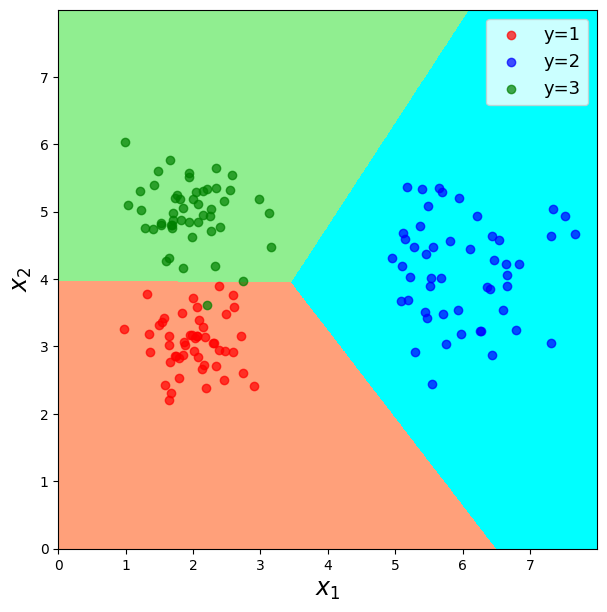

In [15]:
plt.figure(figsize=(7,7))
plot_boundary(X2, y2,softmax_reg, lims=[0, 8, 0, 8])
ax = plt.gca()
ax.set_aspect('equal')

plt.xlabel('$x_1$', fontsize=17)
plt.ylabel('$x_2$', fontsize=17)
plt.legend(loc='upper right', fontsize=13)
plt.show()

In [16]:
A = np.array([[w21-w11, w22-w12],
              [w31-w11, w32-w12]])
b = np.array([w10-w20, w10-w30])
c = np.linalg.solve(A, b)
c

array([3.45545123, 3.94979828])

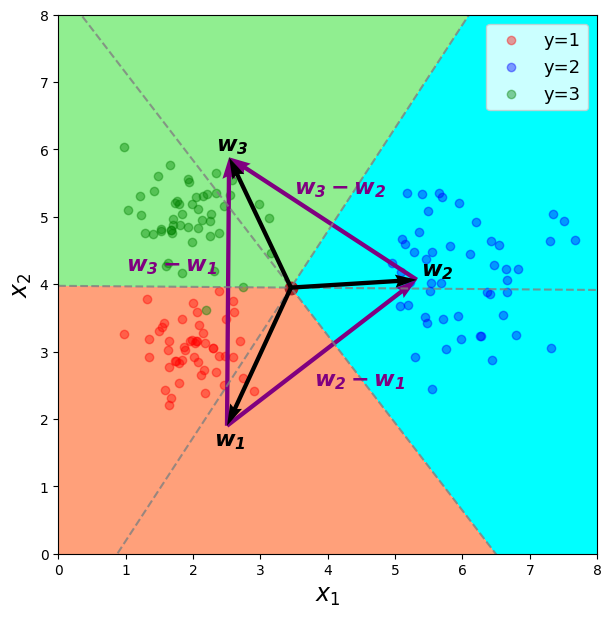

In [17]:
plt.figure(figsize=(7,7))
plot_boundary(X2, y2, softmax_reg, lims=[0, 8, 0, 8], alpha=0.4)
#Plot vectors w1, w2, and w3
plt.quiver(c[0], c[1], w1[0], w1[1], color=['black'],
           width=0.008, angles='xy', scale_units='xy', scale=1, zorder=5)
plt.quiver(c[0], c[1], w2[0], w2[1], color=['black'],
           width=0.008, angles='xy', scale_units='xy', scale=1, zorder=5)
plt.quiver(c[0], c[1], w3[0], w3[1], color=['black'],
           width=0.008, angles='xy', scale_units='xy', scale=1, zorder=5)

plt.text(c[0]+w1[0]-0.2, c[1]+w1[1]-0.3, "$\mathregular{w_1}$",
         color='black',fontsize=16,weight="bold", style="italic")
plt.text(c[0]+w2[0]+0.06, c[1]+w2[1]+0.06, "$\mathregular{w_2}$",
         color='black',fontsize=16, weight="bold", style="italic")
plt.text(c[0]+w3[0]-0.2, c[1]+w3[1]+0.1, "$\mathregular{w_3}$",
         color='black', fontsize=16, weight="bold", style="italic")

#Plot vectors w2-w1, w3-w1, and w3-w2
plt.quiver(c[0]+w1[0], c[1]+w1[1], w2[0]-w1[0], w2[1]-w1[1], color=['purple'],
           width=0.008, angles='xy', scale_units='xy', scale=1, zorder=2, )
plt.quiver(c[0]+w1[0], c[1]+w1[1], w3[0]-w1[0], w3[1]-w1[1], color=['purple'],
           width=0.008, angles='xy', scale_units='xy', scale=1, zorder=2)
plt.quiver(c[0]+w2[0], c[1]+w2[1], w3[0]-w2[0], w3[1]-w2[1], color=['purple'],
           width=0.008, angles='xy', scale_units='xy', scale=1, zorder=2)

plt.text(3.8, 2.5, "$\mathregular{w_2-w_1}$", color='purple', fontsize=16,
         weight="bold", style="italic")
plt.text(3.5, 5.35, "$\mathregular{w_3-w_2}$", color='purple', fontsize=16,
         weight="bold", style="italic")
plt.text(1, 4.2, "$\mathregular{w_3-w_1}$", color='purple', fontsize=16,
         weight="bold", style="italic")

# Plot the intersection point c
plt.scatter(c[0], c[1], s=80, color='brown')

# Plot the decision boundary lines
x_array =  np.linspace(0, 8, 100)
db_y1 = ((w20-w10)+x_array*(w21-w11))/(w12-w22)
plt.plot(x_array, db_y1, linestyle="--", color="gray", alpha=0.8)

db_y2 = ((w30-w10)+x_array*(w31-w11))/(w12-w32)
plt.plot(x_array, db_y2, linestyle="--", color="gray", alpha=0.8)

db_y3 = ((w30-w20)+x_array*(w31-w21))/(w22-w32)
plt.plot(x_array, db_y3, linestyle="--", color="gray", alpha=0.8)

ax = plt.gca()
ax.set_aspect('equal')
plt.xlabel('$x_1$', fontsize=17)
plt.ylabel('$x_2$', fontsize=17)
plt.legend(loc='upper right', fontsize=13)
plt.xlim([0, 8])
plt.ylim([0, 8])
plt.show()

In [18]:
def plot_proba_2d(ax, X, y, clf, lims, z_index):
    gx1, gx2 = np.meshgrid(np.arange(lims[0], lims[1],
                                    (lims[1]-lims[0])/800.0),
                           np.arange(lims[2], lims[3],
                                    (lims[3]-lims[2])/800.0))

    gx1l = gx1.flatten()
    gx2l = gx2.flatten()
    gx = np.vstack((gx1l,gx2l)).T
    gyhat = clf.predict_proba(gx)[:, z_index-1]
    gyhat = gyhat.reshape(gx1.shape)

    pcm = ax.pcolormesh(gx1, gx2, gyhat)
    fig.colorbar(pcm, ax=ax,fraction=0.046, pad=0.04)
    target_labels = np.unique(y)
    marker_colors = ['red', 'blue', 'green', 'orange']
    for i, label in enumerate(target_labels):
        ax.scatter(X[y==label, 0], X[y==label,1],
                   label="y="+str(label), alpha=0.7,
                   color=marker_colors[i])

In [19]:
def plot_proba_3d(ax, X, y, clf, lims, z_index):
    gx1, gx2 = np.meshgrid(np.arange(lims[0], lims[1],
                                    (lims[1]-lims[0])/800.0),
                           np.arange(lims[2], lims[3],
                                    (lims[3]-lims[2])/800.0))

    gx1l = gx1.flatten()
    gx2l = gx2.flatten()
    gx = np.vstack((gx1l,gx2l)).T
    gyhat = clf.predict_proba(gx)[:, z_index-1]
    gyhat = gyhat.reshape(gx1.shape)
    ax.plot_surface(gx1, gx2, gyhat, alpha=0.8, cmap=cm.viridis)
    ax.view_init(65, -130)
    target_labels = np.unique(y)
    marker_colors = ['red', 'blue', 'green', 'orange']
    for i, label in enumerate(target_labels):
        ax.scatter(X[y==label, 0], X[y==label,1],
                   label="y="+str(label), alpha=0.7,
                   color=marker_colors[i])

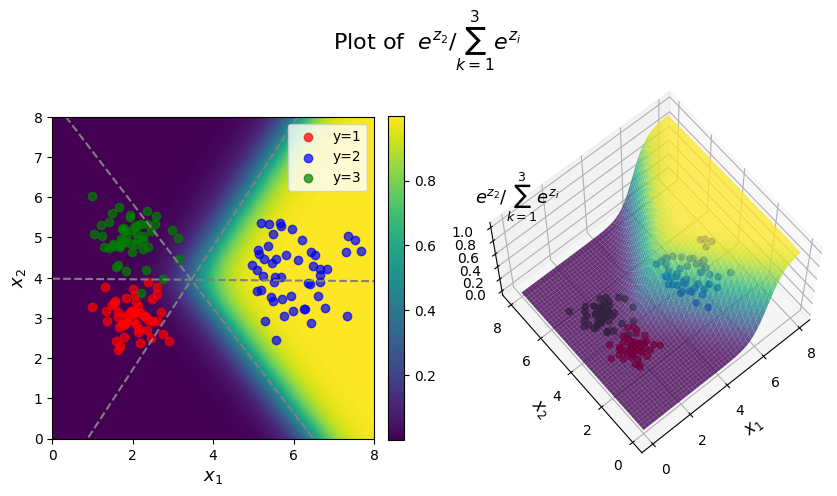

In [20]:
fig = plt.figure(figsize=(10, 8))
ax1 = plt.subplot(1, 2, 1)
ax2 = fig.add_subplot(122, projection='3d')
z_index = 2
plot_proba_2d(ax1, X2, y2, softmax_reg, [0, 8, 0, 8], z_index)

# Plot the decision boundary lines
x_array =  np.linspace(0, 8, 100)
db_y1 = ((w20-w10)+x_array*(w21-w11))/(w12-w22)
ax1.plot(x_array, db_y1, linestyle="--", color="gray")
db_y2 = ((w30-w10)+x_array*(w31-w11))/(w12-w32)
ax1.plot(x_array, db_y2, linestyle="--", color="gray")
db_y3 = ((w30-w20)+x_array*(w31-w21))/(w22-w32)
ax1.plot(x_array, db_y3, linestyle="--", color="gray")
ax1.set_aspect('equal')

ax1.set_xlabel('$x_1$', fontsize=13)
ax1.set_ylabel('$x_2$', fontsize=13)
ax1.set_xlim([0, 8])
ax1.set_ylim([0, 8])
ax1.legend(loc='upper right', fontsize=10)

plot_proba_3d(ax2, X2, y2, softmax_reg, [0, 8, 0, 8], z_index)
ax2.set_xlabel('$x_1$', fontsize=12)
ax2.set_ylabel('$x_2$', fontsize=12)
ax2.text2D(0, 0.71, '$e^{z_2} / \sum_{k=1}^{3}{e^{z_i}}$',
           transform=ax2.transAxes, fontsize=13)
plt.suptitle('Plot of  $e^{z_2} / \sum_{k=1}^{3}{e^{z_i}}$',
             fontsize=16, y=0.83)
plt.show()

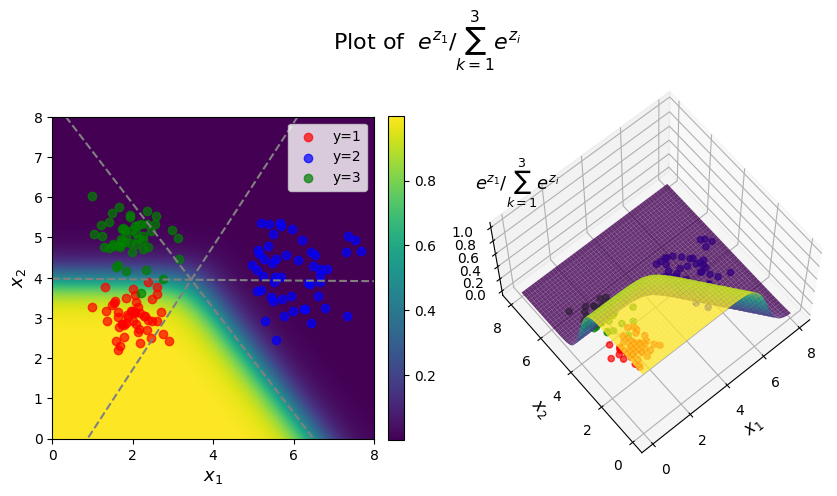

In [21]:
fig = plt.figure(figsize=(10, 8))
ax1 = plt.subplot(1, 2, 1)
ax2 = fig.add_subplot(122, projection='3d')
z_index = 1
plot_proba_2d(ax1, X2, y2, softmax_reg, [0, 8, 0, 8], z_index)

# Plot the decision boundary lines
x_array =  np.linspace(0, 8, 100)
db_y1 = ((w20-w10)+x_array*(w21-w11))/(w12-w22)
ax1.plot(x_array, db_y1, linestyle="--", color="gray")
db_y2 = ((w30-w10)+x_array*(w31-w11))/(w12-w32)
ax1.plot(x_array, db_y2, linestyle="--", color="gray")
db_y3 = ((w30-w20)+x_array*(w31-w21))/(w22-w32)
ax1.plot(x_array, db_y3, linestyle="--", color="gray")
ax1.set_aspect('equal')

ax1.set_xlabel('$x_1$', fontsize=13)
ax1.set_ylabel('$x_2$', fontsize=13)
ax1.set_xlim([0, 8])
ax1.set_ylim([0, 8])
ax1.legend(loc='upper right', fontsize=10)

plot_proba_3d(ax2, X2, y2, softmax_reg, [0, 8, 0, 8], z_index)
ax2.set_xlabel('$x_1$', fontsize=12)
ax2.set_ylabel('$x_2$', fontsize=12)
ax2.text2D(0, 0.75, '$e^{z_1} / \sum_{k=1}^{3}{e^{z_i}}$',
           transform=ax2.transAxes, fontsize=13)
plt.suptitle('Plot of  $e^{z_1} / \sum_{k=1}^{3}{e^{z_i}}$', fontsize=16, y=0.83)
plt.show()

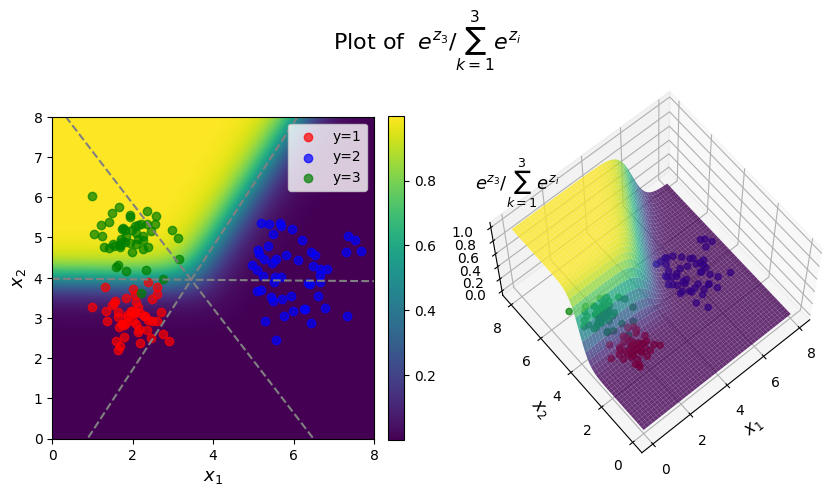

In [22]:
fig = plt.figure(figsize=(10, 8))
ax1 = plt.subplot(1, 2, 1)
ax2 = fig.add_subplot(122, projection='3d')
z_index = 3
plot_proba_2d(ax1, X2, y2, softmax_reg, [0, 8, 0, 8], z_index)

# Plot the decision boundary lines
x_array =  np.linspace(0, 8, 100)
db_y1 = ((w20-w10)+x_array*(w21-w11))/(w12-w22)
ax1.plot(x_array, db_y1, linestyle="--", color="gray")
db_y2 = ((w30-w10)+x_array*(w31-w11))/(w12-w32)
ax1.plot(x_array, db_y2, linestyle="--", color="gray")
db_y3 = ((w30-w20)+x_array*(w31-w21))/(w22-w32)
ax1.plot(x_array, db_y3, linestyle="--", color="gray")
ax1.set_aspect('equal')

ax1.set_xlabel('$x_1$', fontsize=13)
ax1.set_ylabel('$x_2$', fontsize=13)
ax1.set_xlim([0, 8])
ax1.set_ylim([0, 8])
ax1.legend(loc='upper right', fontsize=10)

plot_proba_3d(ax2, X2, y2, softmax_reg, [0, 8, 0, 8], z_index)
ax2.set_xlabel('$x_1$', fontsize=12)
ax2.set_ylabel('$x_2$', fontsize=12)
ax2.text2D(0, 0.75, '$e^{z_3} / \sum_{k=1}^{3}{e^{z_i}}$',
           transform=ax2.transAxes, fontsize=13)
plt.suptitle('Plot of  $e^{z_3} / \sum_{k=1}^{3}{e^{z_i}}$', fontsize=16, y=0.83)
plt.show()

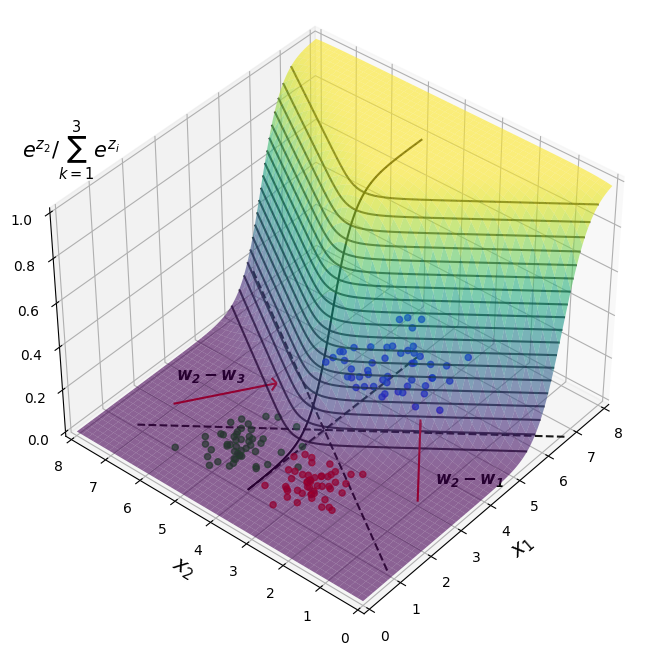

In [23]:
fig = plt.figure(figsize=(10, 8))
lims = [0, 8, 0, 8]
ax = fig.add_subplot(111, projection='3d')
gx1, gx2 = np.meshgrid(np.arange(lims[0], lims[1],
                                (lims[1]-lims[0])/800.0),
                       np.arange(lims[2], lims[3],
                                (lims[3]-lims[2])/800.0))

gx1l = gx1.flatten()
gx2l = gx2.flatten()
gx = np.vstack((gx1l,gx2l)).T
gyhat = softmax_reg.predict_proba(gx)[:, 1]
gyhat = gyhat.reshape(gx1.shape)
ax.plot_surface(gx1, gx2, gyhat, alpha=0.6, cmap=cm.viridis)
ax.contour3D(gx1, gx2, gyhat, 20, cmap=ListedColormap(['black']), alpha=0.8)

x_array =  np.linspace(1, 6.6, 100)
db_y1 = ((w20-w10)+x_array*(w21-w11))/(w12-w22)
db_y2 = ((w30-w10)+x_array*(w31-w11))/(w12-w32)
db_y3 = ((w30-w20)+x_array*(w31-w21))/(w22-w32)
z = softmax_reg.predict_proba(np.vstack((x_array, db_y2)).T)[:, 1]

ax.plot(x_array, db_y2, z, color="black")
ax.plot(x_array, db_y1, len(x_array)*[0], linestyle="--",
        color="black", alpha=0.9)
ax.plot(x_array, db_y2, len(x_array)*[0], linestyle="--",
        color="black", alpha=0.9)
ax.plot(x_array, db_y3, len(x_array)*[0], linestyle="--",
        color="black", alpha=0.9)

target_labels = np.unique(y2)
marker_colors = ['red', 'blue', 'green', 'orange']
for i, label in enumerate(target_labels):
    ax.scatter(X2[y2==label, 0], X2[y2==label,1],
               label="y="+str(label), alpha=0.7,
               color=marker_colors[i])
ax.quiver(3, 1, 0, w21-w11, w22-w12, 0, color=['red'],
          arrow_length_ratio=0.05, length=0.7)
ax.quiver(2, 7, 0, w21-w31, w22-w32, 0, color=['red'],
          arrow_length_ratio=0.05, length=0.7)

ax.view_init(40, -140)
ax.set_xlim([0, 8])
ax.set_ylim([0, 8])
ax.set_zlim([0, 1])
ax.set_xlabel('$x_1$', fontsize=15)
ax.set_ylabel('$x_2$', fontsize=15)
ax.text2D(0, 0.76, '$e^{z_2} / \sum_{k=1}^{3}{e^{z_i}}$',
           transform=ax.transAxes, fontsize=15)
ax.text2D(0.25, 0.4, "$\mathregular{w_2-w_3}$",
          color='black', transform=ax.transAxes, fontsize=12,
          weight="bold", style="italic")
ax.text2D(0.67, 0.23, "$\mathregular{w_2-w_1}$",
          color='black', transform=ax.transAxes, fontsize=12,
          weight="bold", style="italic")
plt.show()

### Adding more labels

In [24]:
np.random.seed(0)
x1 = np.random.randn(50, 2) * 0.4 + np.array([2, 2])
x2 = np.random.randn(50, 2) * 0.7 + np.array([6, 4])
x3 = np.random.randn(50, 2) * 0.5 + np.array([2, 6])
x4 = np.random.randn(50, 2) * 0.5 + np.array([6, 0])

y3 = np.array(50*[1]+50*[2]+50*[3]+50*[4])
X3 = np.vstack((x1, x2, x3, x4))

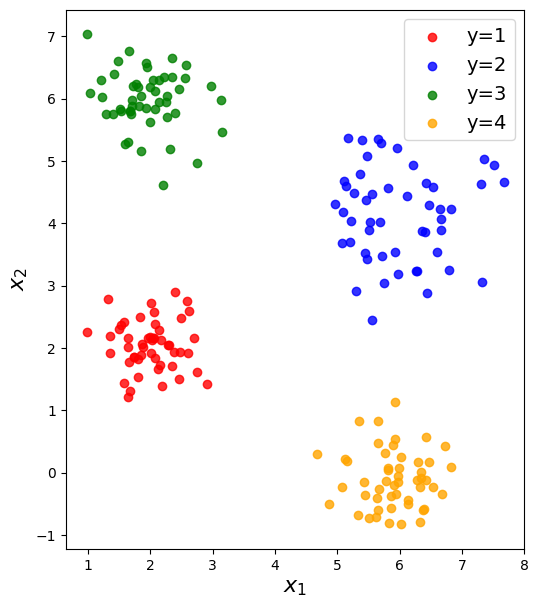

In [25]:
plt.figure(figsize=(7,7))
plt.scatter(X3[y3==1, 0], X3[y3==1,1], label="y=1", alpha=0.8, color="red")
plt.scatter(X3[y3==2, 0], X3[y3==2,1], label="y=2", alpha=0.8, color="blue")
plt.scatter(X3[y3==3, 0], X3[y3==3,1], label="y=3", alpha=0.8, color="green")
plt.scatter(X3[y3==4, 0], X3[y3==4,1], label="y=4", alpha=0.8, color="orange")
plt.legend(loc="best", fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$x_2$", fontsize=16)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

In [26]:
softmax_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
softmax_reg.fit(X3, y3)

LogisticRegression(multi_class='multinomial')

In [27]:
softmax_reg.intercept_, softmax_reg.coef_

(array([ 8.84854706, -7.16242534, -2.36688595,  0.68076423]),
 array([[-1.35603028, -0.84513176],
        [ 1.43654407,  0.87888056],
        [-1.06081789,  1.85290592],
        [ 0.9803041 , -1.88665473]]))

In [28]:
w0 = softmax_reg.intercept_
w1, w2, w3, w4 = softmax_reg.coef_[0], softmax_reg.coef_[1], softmax_reg.coef_[2], softmax_reg.coef_[3]
w10, w20, w30, w40 = w0[0], w0[1], w0[2], w0[3]
w11, w12 = w1[0], w1[1]
w21, w22 = w2[0], w2[1]
w31, w32 = w3[0], w3[1]
w41, w42 = w4[0], w4[1]

In [29]:
c1 = ((w20-w10)*(w12-w32)-(w30-w10)*(w12-w22)) / ((w11-w21)*(w12-w32)-(w11-w31)*(w12-w22))
c2 = ((w11-w21)*(w30-w10)-(w11-w31)*(w20-w10)) / ((w11-w21)*(w12-w32)-(w11-w31)*(w12-w22))

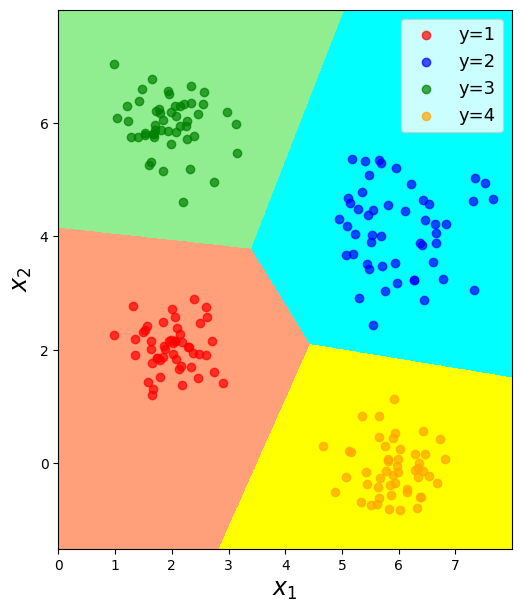

In [30]:
plt.figure(figsize=(7,7))
plot_boundary(X3,y3,softmax_reg, lims=[0, 8, -1.5, 8])

ax = plt.gca()
ax.set_aspect('equal')

plt.xlabel('$x_1$', fontsize=17)
plt.ylabel('$x_2$', fontsize=17)
plt.legend(loc='upper right', fontsize=13)
plt.show()

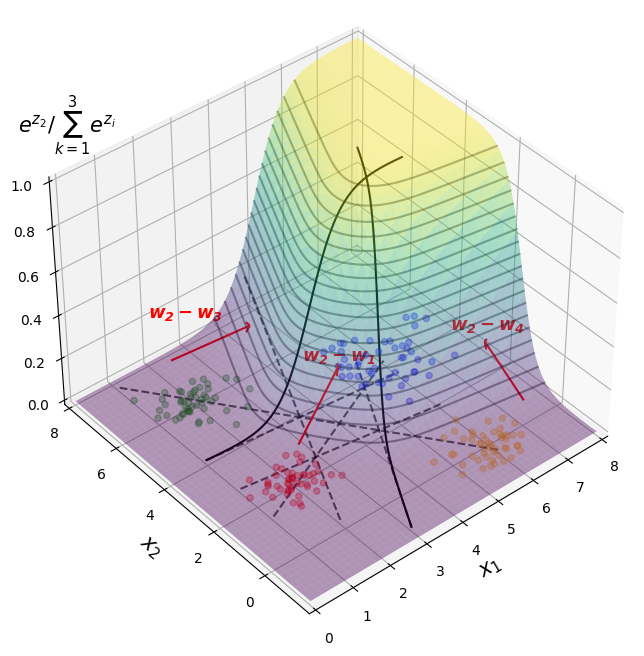

In [31]:
fig = plt.figure(figsize=(10, 8))
lims = [0, 8, -1.5, 8]
ax = fig.add_subplot(111, projection='3d')
gx1, gx2 = np.meshgrid(np.arange(lims[0], lims[1],
                                (lims[1]-lims[0])/800.0),
                       np.arange(lims[2], lims[3],
                                (lims[3]-lims[2])/800.0))

gx1l = gx1.flatten()
gx2l = gx2.flatten()
gx = np.vstack((gx1l,gx2l)).T
gyhat = softmax_reg.predict_proba(gx)[:, 1]
gyhat = gyhat.reshape(gx1.shape)
ax.plot_surface(gx1, gx2, gyhat, alpha=0.4, cmap=cm.viridis)
ax.contour3D(gx1, gx2, gyhat, 20, cmap=ListedColormap(['black']), alpha=0.4)

x_array1 =  np.linspace(1, 6, 100)
x_array2 =  np.linspace(3, 5.5, 100)
x_array3 =  np.linspace(2, 5.5, 100)
db_y1 = ((w20-w10)+x_array1*(w21-w11))/(w12-w22)
db_y2 = ((w30-w10)+x_array1*(w31-w11))/(w12-w32)
db_y3 = ((w30-w20)+x_array3*(w31-w21))/(w22-w32)
db_y4 = ((w40-w20)+x_array1*(w41-w21))/(w22-w42)
db_y5 = ((w40-w10)+x_array2*(w41-w11))/(w12-w42)
db_y6 = ((w40-w30)+x_array1*(w41-w31))/(w32-w42)
z1 = softmax_reg.predict_proba(np.vstack((x_array1, db_y2)).T)[:, 1]
z2 = softmax_reg.predict_proba(np.vstack((x_array2, db_y5)).T)[:, 1]

ax.plot(x_array1, db_y2, z1, color="black")
ax.plot(x_array2, db_y5, z2, color="black")
ax.plot(x_array1, db_y1, len(x_array)*[0], linestyle="--",
        color="black", alpha=0.65)
ax.plot(x_array1, db_y2, len(x_array)*[0], linestyle="--",
        color="black", alpha=0.65)
ax.plot(x_array3, db_y3, len(x_array)*[0], linestyle="--",
        color="black", alpha=0.65)
ax.plot(x_array1, db_y4, len(x_array)*[0], linestyle="--",
        color="black", alpha=0.65)
ax.plot(x_array2, db_y5, len(x_array)*[0], linestyle="--",
        color="black", alpha=0.65)
ax.plot(x_array1, db_y6, len(x_array)*[0], linestyle="--",
        color="black", alpha=0.65)

target_labels = np.unique(y3)
marker_colors = ['red', 'blue', 'green', 'orange']
for i, label in enumerate(target_labels):
    ax.scatter(X3[y3==label, 0], X3[y3==label,1],
               label="y="+str(label), alpha=0.3,
               color=marker_colors[i])
ax.quiver(2.4, 2.4, 0.1, w21-w11, w22-w12, 0.1, color=['red'],
          arrow_length_ratio=0.05, length=0.7)
ax.quiver(2, 7, 0.1, w21-w31, w22-w32, 0.1, color=['red'],
          arrow_length_ratio=0.05, length=0.7)
ax.quiver(7, 0, 0.1, w21-w41, w22-w42, 0.1, color=['red'],
          arrow_length_ratio=0.05, length=0.7)

ax.view_init(40, -130)
ax.set_xlim([0, 8])
ax.set_ylim([-1.5, 8])
ax.set_zlim([0, 1])
ax.set_xlabel('$x_1$', fontsize=15)
ax.set_ylabel('$x_2$', fontsize=15)
ax.text2D(0, 0.8, '$e^{z_2} / \sum_{k=1}^{3}{e^{z_i}}$',
           transform=ax.transAxes, fontsize=15)
ax.text2D(0.21, 0.5, "$\mathregular{w_2-w_3}$",
          color='red', transform=ax.transAxes, fontsize=13,
          weight="bold", style="italic")
ax.text2D(0.7, 0.48, "$\mathregular{w_2-w_4}$",
          color='red', transform=ax.transAxes, fontsize=13,
          weight="bold", style="italic")
ax.text2D(0.46, 0.43, "$\mathregular{w_2-w_1}$",
          color='red', transform=ax.transAxes, fontsize=13,
          weight="bold", style="italic")
plt.show()

### The softmax layer in a neural network

In [153]:
np.random.seed(0)
random.seed(0)
tf.random.set_seed(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X2)
y_categorical = to_categorical(y2-1, num_classes=3)

In [154]:
model = Sequential()
model.add(Dense(3, activation='softmax', input_shape=(2,)))

In [155]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 3)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

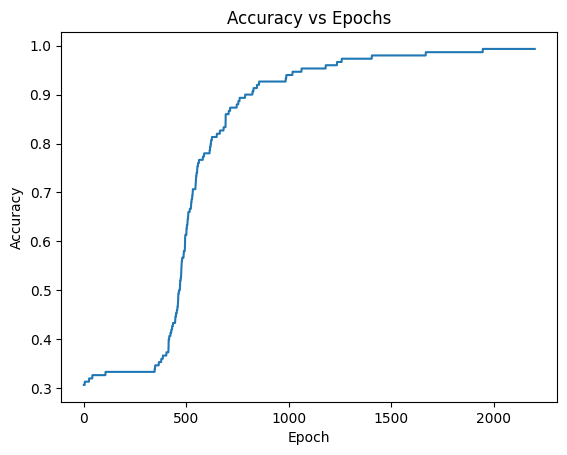

In [156]:
history = model.fit(X_scaled, y_categorical, epochs=2200,
                    verbose=0, batch_size=X_scaled.shape[0])
plt.plot(history.history['accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [157]:
output_layer_weights = model.layers[-1].get_weights()[0]
output_layer_biases = model.layers[-1].get_weights()[1]

In [158]:
w10, w20, w30 = output_layer_biases[0], output_layer_biases[1], \
                output_layer_biases[2]
w11, w12 = output_layer_weights[0,0], output_layer_weights[1,0]
w21, w22 = output_layer_weights[0,1], output_layer_weights[1,1]
w31, w32 = output_layer_weights[0,2], output_layer_weights[1,2]

In [159]:
w1 = output_layer_weights[:, 0]
w2 = output_layer_weights[:, 1]
w3 = output_layer_weights[:, 2]

In [160]:
A = np.array([[w21-w11, w22-w12],
              [w31-w11, w32-w12]])
b = np.array([w10-w20, w10-w30])
c = np.linalg.solve(A, b)
c

array([-0.12826993, -0.13795996], dtype=float32)

7813/7813 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


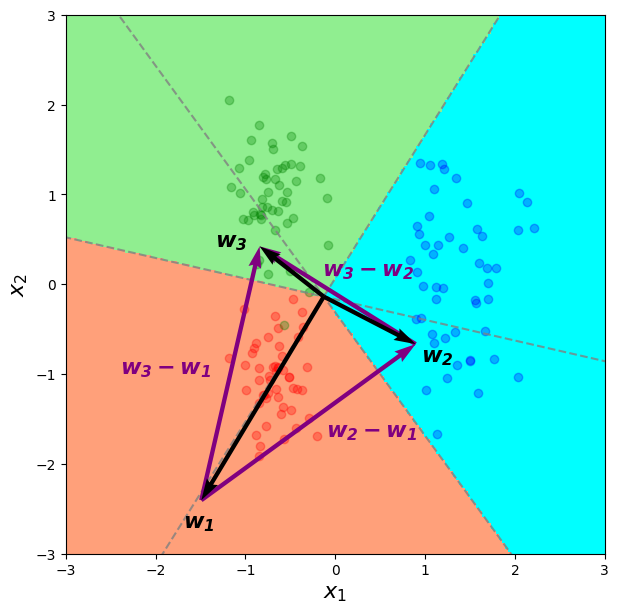

In [161]:
plt.figure(figsize=(7,7))
lims=[-10, 6, -10, 6]
gx1, gx2 = np.meshgrid(np.arange(lims[0], lims[1],
                                (lims[1]-lims[0])/500.0),
                       np.arange(lims[2], lims[3],
                                (lims[3]-lims[2])/500.0))
backgd_colors = ['lightsalmon', 'aqua', 'lightgreen', 'yellow']
marker_colors = ['red', 'blue', 'green', 'orange']
gx1l = gx1.flatten()
gx2l = gx2.flatten()
gx = np.vstack((gx1l,gx2l)).T
gyhat = model.predict(gx)
gyhat = gyhat.argmax(axis=1)+1
gyhat = gyhat.reshape(gx1.shape)
target_labels = np.unique(y2)
n = len(target_labels)
plt.pcolormesh(gx1, gx2, gyhat, cmap=ListedColormap(backgd_colors[:n]))
for i, label in enumerate(target_labels):
    plt.scatter(X_scaled[y2==label, 0], X_scaled[y2==label,1], label="y="+str(label),
                color=marker_colors[i], alpha= 0.3)

#Plot vectors w1, w2, and w3
plt.quiver(c[0], c[1], w1[0], w1[1], color=['black'],
           width=0.008, angles='xy', scale_units='xy', scale=1, zorder=5)
plt.quiver(c[0], c[1], w2[0], w2[1], color=['black'],
           width=0.008, angles='xy', scale_units='xy', scale=1, zorder=5)
plt.quiver(c[0], c[1], w3[0], w3[1], color=['black'],
           width=0.008, angles='xy', scale_units='xy', scale=1, zorder=5)

# Plot the decision boundary lines
x_array =  np.linspace(-8, 8, 100)
db_y1 = ((w20-w10)+x_array*(w21-w11))/(w12-w22)
plt.plot(x_array, db_y1, linestyle="--", color="gray", alpha=0.8)

db_y2 = ((w30-w10)+x_array*(w31-w11))/(w12-w32)
plt.plot(x_array, db_y2, linestyle="--", color="gray", alpha=0.8)

db_y3 = ((w30-w20)+x_array*(w31-w21))/(w22-w32)
plt.plot(x_array, db_y3, linestyle="--", color="gray", alpha=0.8)

#Plot vectors w2-w1, w3-w1, and w3-w2
plt.quiver(c[0]+w1[0], c[1]+w1[1], w2[0]-w1[0], w2[1]-w1[1], color=['purple'],
           width=0.008, angles='xy', scale_units='xy', scale=1, zorder=2, )
plt.quiver(c[0]+w1[0], c[1]+w1[1], w3[0]-w1[0], w3[1]-w1[1], color=['purple'],
           width=0.008, angles='xy', scale_units='xy', scale=1, zorder=2)
plt.quiver(c[0]+w2[0], c[1]+w2[1], w3[0]-w2[0], w3[1]-w2[1], color=['purple'],
           width=0.008, angles='xy', scale_units='xy', scale=1, zorder=2)

plt.text(c[0]+w1[0]-0.2, c[1]+w1[1]-0.3, "$\mathregular{w_1}$",
         color='black',fontsize=16,weight="bold", style="italic")
plt.text(c[0]+w2[0]+0.06, c[1]+w2[1]-0.2, "$\mathregular{w_2}$",
         color='black',fontsize=16, weight="bold", style="italic")
plt.text(c[0]+w3[0]-0.5, c[1]+w3[1], "$\mathregular{w_3}$",
         color='black', fontsize=16, weight="bold", style="italic")

plt.text(-0.1, -1.7, "$\mathregular{w_2-w_1}$", color='purple', fontsize=16,
         weight="bold", style="italic")
plt.text(-0.15, 0.1, "$\mathregular{w_3-w_2}$", color='purple', fontsize=16,
         weight="bold", style="italic")
plt.text(-2.4, -1, "$\mathregular{w_3-w_1}$", color='purple', fontsize=16,
         weight="bold", style="italic")

ax = plt.gca()
ax.set_aspect('equal')
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$x_2$", fontsize=16)
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()